In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [2]:
analytical_retardation_type = "langmuir"

In [3]:
MODE = "pos"

base_dir = Path(f"../data_out/{analytical_retardation_type}/default_finn").resolve()
res_net_in_path = base_dir / "residual_training_data"
res_net_out_path = base_dir / "residual_nets_output"

In [4]:
X_train_diss = np.load(res_net_in_path / f"X_{MODE}_train_diss.npy")
X_train_tot = np.load(res_net_in_path / f"X_{MODE}_train_tot.npy")
X_test_diss = np.load(res_net_in_path / f"X_{MODE}_test_diss.npy")
X_test_tot = np.load(res_net_in_path / f"X_{MODE}_test_tot.npy")

true_residuals_diss = np.load(res_net_in_path / f"Y_{MODE}_train_diss.npy").reshape(
    -1, 1
)
true_residuals_tot = np.load(res_net_in_path / f"Y_{MODE}_train_tot.npy").reshape(-1, 1)

In [5]:
true_residuals_diss.shape

(663, 1)

# Training Data for Residual Nets

### Inputs (X)

In [6]:
X_train_diss.shape

(663, 2)

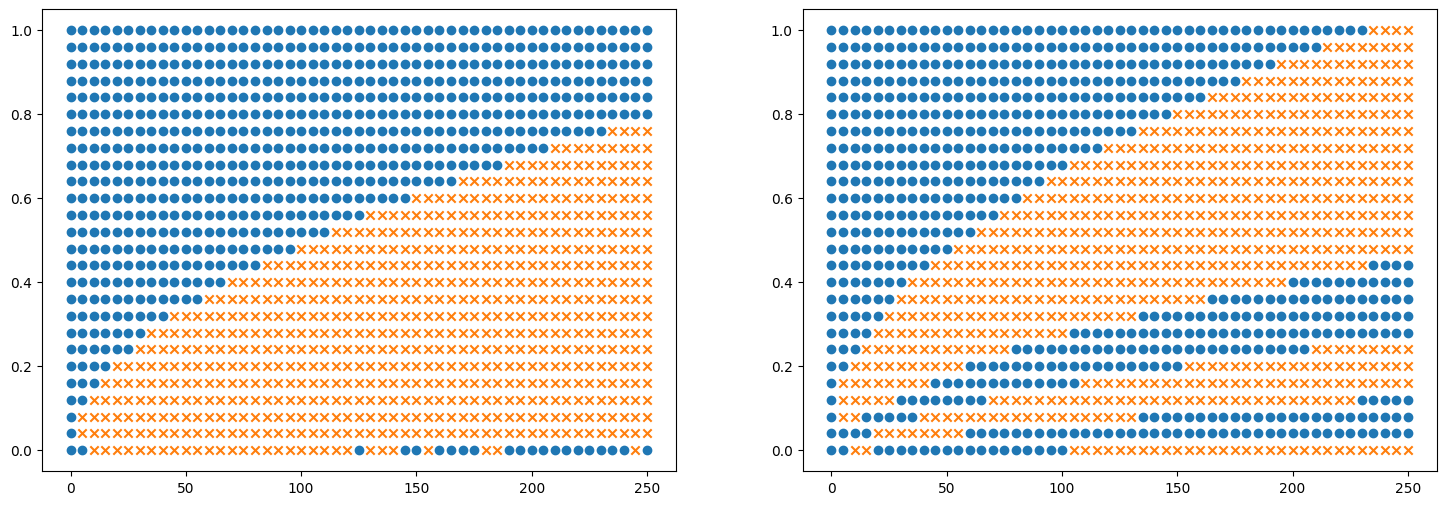

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
ax1.scatter(*X_train_diss.T)
ax2.scatter(*X_train_tot.T)
ax1.scatter(*X_test_diss.T, marker="x")
ax2.scatter(*X_test_tot.T, marker="x")
plt.show()

### Targets (Y)

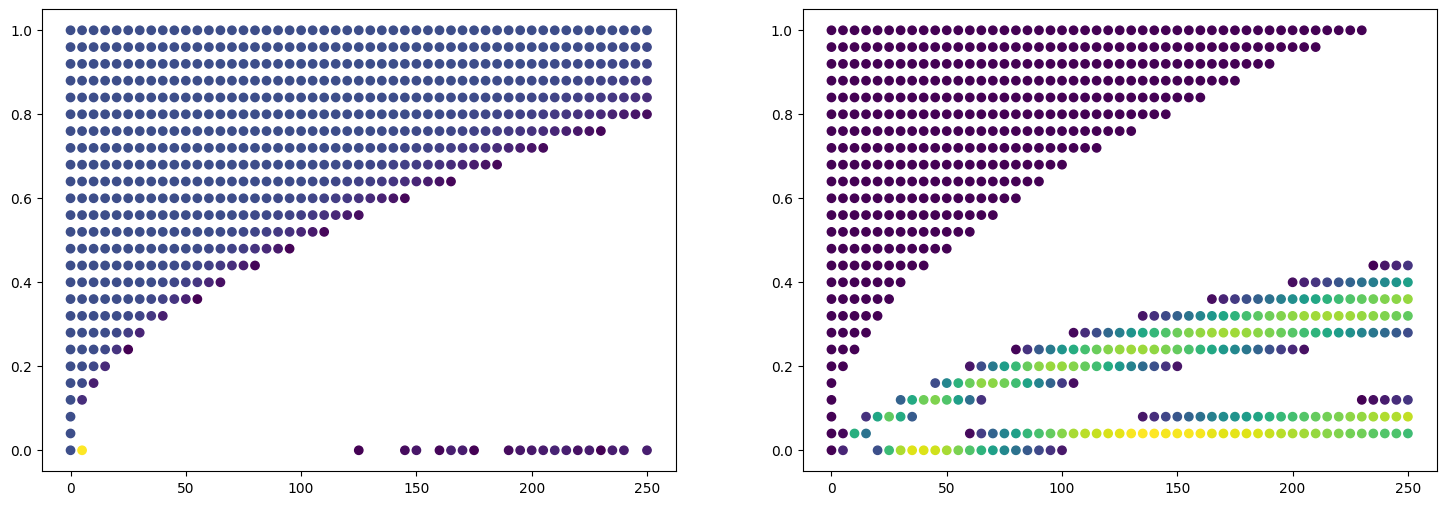

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
ax1.scatter(*X_train_diss.T, c=true_residuals_diss)
ax2.scatter(*X_train_tot.T, c=true_residuals_tot)
plt.show()

In [9]:
print(true_residuals_diss.min(), true_residuals_diss.max())

1.6287959e-07 0.00010041996


# Learned Residuals

In [10]:
pred_residuals_diss = np.load(res_net_out_path / f"Y_{MODE}_test_diss.npy")
pred_residuals_tot = np.load(res_net_out_path / f"Y_{MODE}_test_tot.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/r/Documents/stud/ss24/finnpinn/data_out/langmuir/default_finn/residual_nets_output/Y_pos_test_diss.npy'

In [ ]:
print(pred_residuals_diss.min(), pred_residuals_diss.max())

-0.0462644 0.30062765


### Test Set Predictions

ValueError: 'c' argument has 1326 elements, which is inconsistent with 'x' and 'y' with size 663.

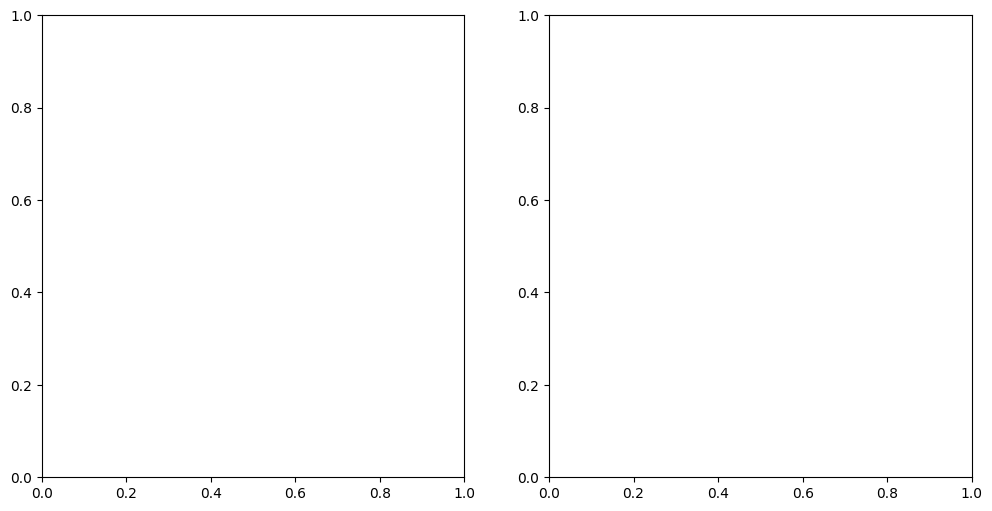

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(*X_test_diss.T, c=pred_residuals_diss)
ax2.scatter(*X_test_tot.T, c=pred_residuals_tot)
plt.show()

### Combined with Train Set

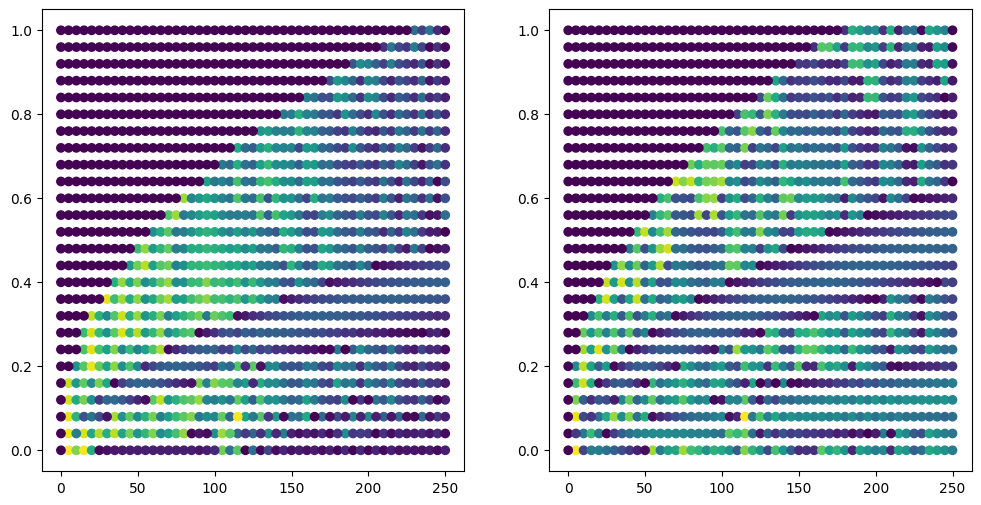

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(*X_test_diss.T, c=pred_residuals_diss)
ax2.scatter(*X_test_tot.T, c=pred_residuals_tot)
ax1.scatter(*X_train_diss.T, c=true_residuals_diss)
ax2.scatter(*X_train_tot.T, c=true_residuals_tot)
plt.show()

### Combined before plot (maybe then scaling is proper)

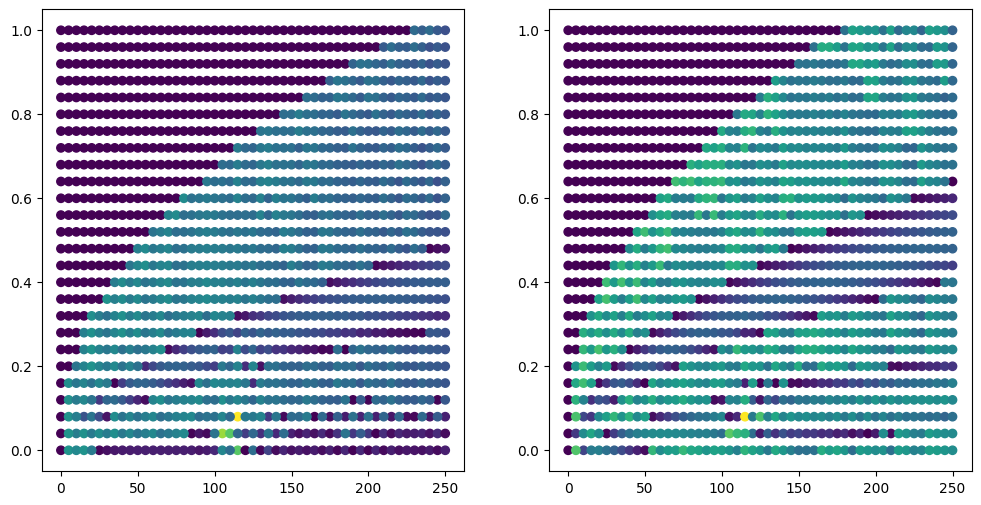

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
X_full_diss = np.concatenate((X_train_diss, X_test_diss), axis=0)
X_full_tot = np.concatenate((X_train_tot, X_test_tot), axis=0)
residuals_full_diss = np.concatenate((true_residuals_diss, pred_residuals_diss), axis=0)
residuals_full_tot = np.concatenate((true_residuals_tot, pred_residuals_tot), axis=0)
ax1.scatter(*X_full_diss.T, c=residuals_full_diss)
ax2.scatter(*X_full_tot.T, c=residuals_full_tot)
plt.show()

### Output from the residual net training script

In [ ]:
x = np.linspace(0, 1, 26)
t = np.linspace(0, 10000, 2001)[:51]

X, T = np.meshgrid(x, t)

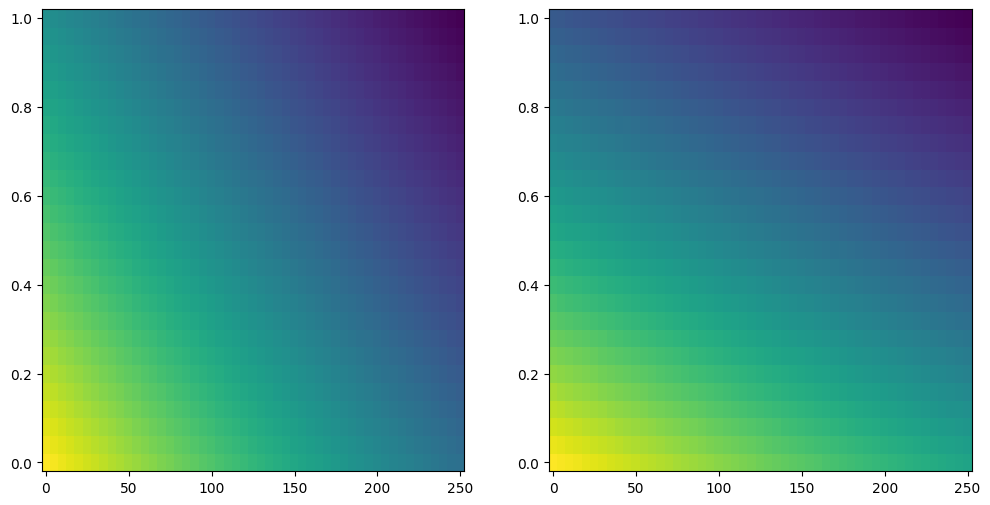

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
residuals_full_diss = np.load(res_net_out_path / f"Y_{MODE}_full_diss.npy")
residuals_full_tot = np.load(res_net_out_path / f"Y_{MODE}_full_tot.npy")
ax1.pcolor(T, X, residuals_full_diss.reshape(51, 26))
ax2.pcolor(T, X, residuals_full_tot.reshape(51, 26))
plt.show()